<a href="https://colab.research.google.com/github/mt508/machine-learning-/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m=100
x=2*np.random.rand(m,1)

y=4.21509616+2.77011339*x+np.random.randn(m,1)

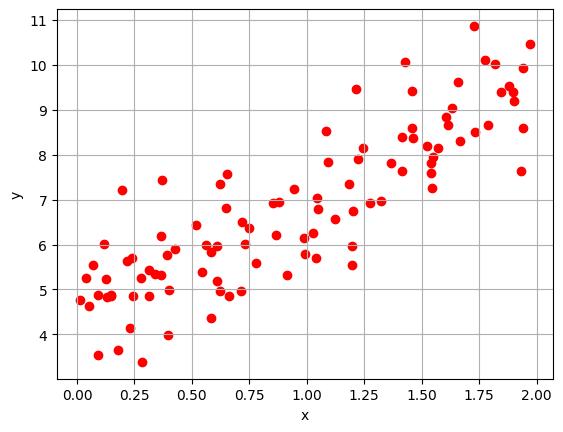

In [2]:
plt.scatter(x,y,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [3]:
from sklearn.preprocessing import add_dummy_feature
x_b=add_dummy_feature(x)
thethabest=np.linalg.inv(x_b.T@(x_b))@x_b.T@y

In [4]:
import numpy as np
from sklearn.preprocessing import add_dummy_feature

class LinearRegression:
    def __init__(self, X=None, Y=None):
        self.X = X
        self.Y = Y
        self.best_fit = None
        self.y_prediction = None

    def fit(self,X,Y):
        x_b = add_dummy_feature(X)
        self.best_fit = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ Y
        self.y_prediction = x_b @ self.best_fit
        return self

    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        x_b = add_dummy_feature(X)
        y_prediction = x_b @ self.best_fit
        return y_prediction


In [5]:
X = np.array([[1],
              [2],
              [3],
              [4]], dtype=float)

In [6]:
Y = np.array([[2.5],
              [3.0],
              [3.5],
              [4.0]])

In [7]:
model=LinearRegression()
model.fit(X,Y)
model.predict([[5]])

array([[4.5]])

In [8]:
thetha_best_svd,residual,rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)

In [9]:
thetha_best_svd

array([[4.43019232],
       [2.54022678]])

In [11]:


class real_linear_regression:
    def __init__(self):
        self.theta_best_svd = None
        self.X = None
        self.Y = None
        self.prediction = None

    def fit(self, X, Y, rcond=1e-6):
        self.X = np.array(X)
        self.Y = np.array(Y)


        x_b = add_dummy_feature(self.X)


        U, sigma, Vt = np.linalg.svd(x_b, full_matrices=False)


        threshold = rcond * sigma[0]


        sigma_inv = np.array([1/si if si > threshold else 0 for si in sigma])


        sigma_plus = np.diag(sigma_inv)


        self.theta_best_svd = Vt.T @ sigma_plus @ U.T @ self.Y


        self.prediction = x_b @ self.theta_best_svd

        return self

    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)


        x_b = add_dummy_feature(X)


        return x_b @ self.theta_best_svd


In [12]:
model3=real_linear_regression()
model3.fit(X,Y)
model3.predict([[5]])

array([[4.5]])

In [13]:
X_verify = np.array([
    [1, 2],
    [2, 4],
    [3, 6],
    [4, 8]
], dtype=float)

y_verify = np.array([1, 2, 3, 4], dtype=float)

In [14]:
linear_model=LinearRegression().fit(X_verify,y_verify)
linear_model.predict([[5,8]])

LinAlgError: Singular matrix

In [15]:
linear_model=real_linear_regression().fit(X_verify,y_verify)
linear_model.predict([[5,8]])

array([4.2])